# 

use tiingo api to get stock prices data

In [63]:
# settings.py
from dotenv import load_dotenv
load_dotenv()

# OR, the same with increased verbosity:
load_dotenv(verbose=True)

# OR, explicitly providing path to '.env'
from pathlib import Path  # python3 only
env_path = Path('D:\python_code\deep_learning_in_python\stock\numeric\custom_loss_dl_data_from_tiingo') / '.env'
load_dotenv(dotenv_path=env_path)

True

In [64]:
# settings.py
import os
TIINGO_API_KEY = os.getenv("TIINGO_API_KEY")

In [65]:
"""使用TCN加上custom loss function，與使用TCN, loss func使用MSE比較，為了減少Random seed的影響
，將每個參數組合跑10次後，平均，做出來的結果顯示加上custom loss func後，
報酬率平均比單純使用MSE作為損失函數好10%"""

'使用TCN加上custom loss function，與使用TCN, loss func使用MSE比較，為了減少Random seed的影響\n，將每個參數組合跑10次後，平均，做出來的結果顯示加上custom loss func後，\n報酬率平均比單純使用MSE作為損失函數好10%'

In [66]:
ticker="SPY"
startDate="1990-01-01"
EndDate="2018-12-31"

In [67]:
import requests
headers = {
    'Content-Type': 'application/json'
}
requestResponse = requests.get(
    "https://api.tiingo.com/tiingo/daily/"+ticker+"/prices?startDate="+startDate+"&endDate="+EndDate+"&token="+TIINGO_API_KEY, headers=headers)


In [86]:
import json
from pandas.io.json import json_normalize
import pandas as pd

jdata = json.loads(requestResponse.text)
df = pd.DataFrame(jdata)

In [87]:
df.columns

Index(['adjClose', 'adjHigh', 'adjLow', 'adjOpen', 'adjVolume', 'close',
       'date', 'divCash', 'high', 'low', 'open', 'splitFactor', 'volume'],
      dtype='object')

In [96]:
df.drop(['high', 'low','open', 'adjVolume', 'close'], axis=1, inplace=True)

In [97]:
df.columns

Index(['adjClose', 'adjHigh', 'adjLow', 'adjOpen', 'divCash', 'splitFactor',
       'volume', 'date'],
      dtype='object')

In [98]:
df['date'] = pd.to_datetime(df["date"])


In [99]:
df["only_date"] = df['date'].apply(lambda x:x.date())
df.drop(['date'], axis=1, inplace=True)


In [100]:
df.rename(columns={"only_date":"date"},inplace=True)


In [101]:
df_idx = df.set_index(["date"], drop=True)

In [102]:
df_idx

,adjClose,adjHigh,adjLow,adjOpen,divCash,splitFactor,volume
date,,,,,,,
1993-01-29,26.586114,26.604993,26.472660,26.604993,0.0000,1.0,1003200
1993-02-01,26.775204,26.775204,26.604993,26.604993,0.0000,1.0,480500
1993-02-02,26.831901,26.850841,26.699568,26.756265,0.0000,1.0,201300
1993-02-03,27.115567,27.134446,26.850841,26.869719,0.0000,1.0,529400
1993-02-04,27.229021,27.285718,26.907537,27.210082,0.0000,1.0,531500
1993-02-05,27.210082,27.266840,27.058810,27.210082,0.0000,1.0,492100
1993-02-08,27.210082,27.304658,27.172264,27.210082,0.0000,1.0,596100
1993-02-09,27.020992,27.115567,26.964295,27.115567,0.0000,1.0,122100
1993-02-10,27.058810,27.077749,26.945356,27.020992,0.0000,1.0,379600


In [103]:
df

,adjClose,adjHigh,adjLow,adjOpen,divCash,splitFactor,volume,date
0,26.586114,26.604993,26.472660,26.604993,0.0000,1.0,1003200,1993-01-29
1,26.775204,26.775204,26.604993,26.604993,0.0000,1.0,480500,1993-02-01
2,26.831901,26.850841,26.699568,26.756265,0.0000,1.0,201300,1993-02-02
3,27.115567,27.134446,26.850841,26.869719,0.0000,1.0,529400,1993-02-03
4,27.229021,27.285718,26.907537,27.210082,0.0000,1.0,531500,1993-02-04
5,27.210082,27.266840,27.058810,27.210082,0.0000,1.0,492100,1993-02-05
6,27.210082,27.304658,27.172264,27.210082,0.0000,1.0,596100,1993-02-08
7,27.020992,27.115567,26.964295,27.115567,0.0000,1.0,122100,1993-02-09
8,27.058810,27.077749,26.945356,27.020992,0.0000,1.0,379600,1993-02-10
9,27.191203,27.304658,27.096628,27.096628,0.0000,1.0,19500,1993-02-11


In [104]:
df_idx[0:5]

,adjClose,adjHigh,adjLow,adjOpen,divCash,splitFactor,volume
date,,,,,,,
1993-01-29,26.586114,26.604993,26.472660,26.604993,0.0,1.0,1003200
1993-02-01,26.775204,26.775204,26.604993,26.604993,0.0,1.0,480500
1993-02-02,26.831901,26.850841,26.699568,26.756265,0.0,1.0,201300
1993-02-03,27.115567,27.134446,26.850841,26.869719,0.0,1.0,529400
1993-02-04,27.229021,27.285718,26.907537,27.210082,0.0,1.0,531500


In [105]:
import tensorflow as tf
print(tf.__version__)


2.0.0-dev20190213


In [106]:
print(tf.__file__ )

C:\Windows\system32\env002\lib\site-packages\tensorflow\__init__.py


# work: model  9 10

In [107]:
#tf.enable_eager_execution()

In [108]:
tf.executing_eagerly()


True

In [109]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import pydot_ng
%matplotlib inline

In [110]:
import mpld3
mpld3.enable_notebook()

In [111]:
#把順序調換
df_idx = df_idx.sort_index(axis=0, ascending=False)
df_idx = df_idx.iloc[::-1]

In [112]:
df_idx.head(5)

,adjClose,adjHigh,adjLow,adjOpen,divCash,splitFactor,volume
date,,,,,,,
1993-01-29,26.586114,26.604993,26.472660,26.604993,0.0,1.0,1003200
1993-02-01,26.775204,26.775204,26.604993,26.604993,0.0,1.0,480500
1993-02-02,26.831901,26.850841,26.699568,26.756265,0.0,1.0,201300
1993-02-03,27.115567,27.134446,26.850841,26.869719,0.0,1.0,529400
1993-02-04,27.229021,27.285718,26.907537,27.210082,0.0,1.0,531500


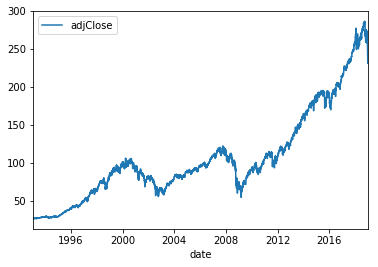

In [114]:
data = df_idx
data.plot(y='adjClose')

In [115]:
diff = data.index.values[-1] - data.index.values[0]


AttributeError: 'datetime.timedelta' object has no attribute 'astype'

In [117]:
diff

datetime.timedelta(9467)

In [120]:
days = diff.astype('timedelta64[D]')
days = days / np.timedelta64(1, 'D')
years = int(days/365)
print("total data days:",days)
print("Total data: %d years"%years)
print("80 percent data = 1988 to %d"%(1988 + int(0.8*years)))
print(diff)
delay = 5

AttributeError: 'datetime.timedelta' object has no attribute 'astype'

In [ ]:
#切割訓練與測試資料
split_date = pd.Timestamp('01-01-2013')

train = data.loc[:split_date]
test = data.loc[split_date:]
test_date = test.index
test_date = pd.to_datetime(test_date)
train_date = train.index
train_date = pd.to_datetime(train_date)

In [ ]:
# 資料正規化

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
train_sc = sc.fit_transform(train)
test_sc = sc.transform(test)

In [ ]:
#without sc
#train_sc = train
#test_sc = test

In [ ]:
train_sc.shape

In [ ]:
train_sc_df = pd.DataFrame(train_sc,index=train.index,columns=train.columns)
test_sc_df = pd.DataFrame(test_sc,index=test.index,columns=test.columns)



In [ ]:
train_sc_df

In [ ]:
test_sc_df

In [ ]:
for s in range(-delay,-delay+1):
    train_sc_df['Y_{}'.format(s)] = train_sc_df['Close'].shift(s)
    test_sc_df['Y_{}'.format(s)] = test_sc_df['Close'].shift(s)



In [ ]:
train_sc_df

In [ ]:
test_sc_df

In [ ]:
#X_train = train_sc_df.dropna().drop('Y', axis=1)
X_train = train_sc_df.dropna().drop('Y_-'+str(delay), axis=1)
y_train = train_sc_df.dropna()['Y_-'+str(delay)]
X_train = X_train.as_matrix()
y_train = y_train.as_matrix()


In [ ]:
X_train

In [ ]:
X_train.shape

In [ ]:
y_train.shape

In [ ]:
X_test = test_sc_df.dropna().drop('Y_-'+str(delay), axis=1)
y_test = test_sc_df.dropna().dropna()['Y_-'+str(delay)]
X_test = X_test.as_matrix()
y_test = y_test.as_matrix()


In [ ]:
y_train

In [ ]:
X_test

In [ ]:
y_test

In [ ]:
print('Train size: (%d x %d)'%(X_train.shape[0], X_train.shape[1]))
print('Test size: (%d x %d)'%(X_test.shape[0], X_test.shape[1]))

# setup

In [ ]:
loss_imagepath ='images/loss/'
predict_imagepath ='images/predict/'
losspath = 'csv/loss/'
if (not (os.path.exists(losspath))):
        os.makedirs(losspath)
model_dirpath = 'h5/'
file_name='file_name'

#for func initiate
history_model='history_model'
input_tensor='input_tensor'
y_pred='y_pred'
Target_DirPath='Target_DirPath'
test_date_trim='test_date_trim'
train_date_trim='train_date_trim'


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Add,Reshape,Lambda
from tensorflow.keras.optimizers import Adam, RMSprop
import tensorflow.keras.backend as K
from sklearn.metrics import r2_score
from tensorflow.keras.callbacks import EarlyStopping,CSVLogger
from tensorflow.keras.layers import LSTM
from tensorflow.keras import Input,layers
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import PReLU
from tensorflow.keras.utils import plot_model
K.clear_session()
#from tcn import compiled_tcn,TCN

def adj_r2_score(r2, n, k):
    return 1-((1-r2)*((n-1)/(n-k-1)))

X_tr_t = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_tst_t = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])


val_split_ratio = 0.1
penalty=0.1

In [ ]:
def plot_model_architecture(model, file_name):
    file_path = 'images/model/{}.png'.format(file_name)
    if not os.path.exists(os.path.dirname(file_path)):
        try:
            os.makedirs(os.path.dirname(file_path))
        except OSError as exc: # Guard against race condition
            if exc.errno != errno.EEXIST:
                raise

    plot_model(model, to_file=file_path, show_shapes=True, show_layer_names=False)

In [ ]:
def loadmodel(model_dirpath=model_dirpath,file_name=file_name):
    model = load_model(model_dirpath + file_name + '.h5')
    return model
def loss_image(history_model=history_model, loss_imagepath=loss_imagepath, file_name=file_name):
    import matplotlib.pyplot as plt
    loss = history_model.history['loss']
    val_loss = history_model.history['val_loss']
    epochs = range(1, len(loss) + 1)
    plt.figure()
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    if (not (os.path.exists(loss_imagepath))):
                os.makedirs(loss_imagepath)
    plt.savefig(loss_imagepath +  file_name +'_loss.png')
    plt.show()    

def CSV(losspath=losspath, file_name=file_name):
    csv_logger = CSVLogger(losspath + file_name + '_log.csv')
    return csv_logger
def predict_image(history_model=history_model,X_tst_t=X_tst_t,input_tensor=input_tensor,
                  predict_imagepath=predict_imagepath, file_name=file_name):
    from sklearn.metrics import r2_score
    y_pred = model.predict([X_tst_t])
    #y_pred是三天前就知道，所以往前移三格
    y_test_pic = y_test[:]
    y_pred_pic = y_pred[delay:]
    y_test_rsquare = y_test[:]
    plt.plot(y_test_pic, label='True')
    plt.plot(y_pred_pic, label='pred')
    plt.xlabel('Observation')
    plt.ylabel('Scaled_Value')
    plt.legend()
    print("y_pred.shape:",y_pred.shape)
    print("y_test_rsquare.shape:",y_test_rsquare.shape)
    r2_test = r2_score(y_test_rsquare, y_pred)
    print('R-Squared: %f'%(r2_test))
    print("The Adjusted R2 score on the Test set is:\t{:0.3f}"\
          .format(adj_r2_score(r2_test, X_test.shape[0], X_test.shape[1])))
    if (not (os.path.exists(predict_imagepath))):
            os.makedirs(predict_imagepath)
    plt.savefig(predict_imagepath +  file_name +'_loss.png')
    plt.show()    
    return y_pred
def save_csv(y_pred=y_pred,X_train=X_train,X_test=X_test,Target_DirPath=Target_DirPath,\
             file_name=file_name,test_date=test_date):
    # 把價格縮放解除
    ## create empty table with label fields
    y_pred_data_like = np.zeros(shape=(len(y_pred), X_train.shape[1]))
    ## put the predicted values in the right field
    y_pred_data_like[:,0] = y_pred[:,0]
    ## inverse transform and then select the right field
    y_pred_data = sc.inverse_transform(y_pred_data_like)[:,0]

    #檢查測試資料的維度
    yd_size = X_test.shape[0]

    # 把價格轉換維度
    yd = y_pred_data.reshape(yd_size,)

    #把最後X天刪除(預測X天後)
    test_date_trim = np.delete(test_date, np.s_[-delay:])

    # 製作CSV
    AnalysisResult = pd.DataFrame()
    Date = pd.Series(test_date_trim)
    Close = pd.Series(yd)
    Date.name = 'Date'
    Close.name = 'Close'

    # 因為放在MC要開高低收，所以複製收盤填入
    Open = Close.copy()
    High = Close.copy()
    Low = Close.copy()
    Open.name = 'Open'
    High.name = 'High'
    Low.name = 'Low'

    AnalysisResult = pd.concat([AnalysisResult,Date], axis=1)
    AnalysisResult = pd.concat([AnalysisResult,Close], axis=1)
    AnalysisResult = pd.concat([AnalysisResult,Open], axis=1)
    AnalysisResult = pd.concat([AnalysisResult,High], axis=1)
    AnalysisResult = pd.concat([AnalysisResult,Low], axis=1)

    # 輸出CSV檔案
    import os
    Target_DirPath = 'Deep-Learning-in-Python-master/'
    if (not (os.path.exists(Target_DirPath))):
            os.makedirs(Target_DirPath)
    AnalysisResult.to_csv(Target_DirPath + file_name+'.csv', mode='w', header=True, index=False)
    
def save_train_csv(file_name=file_name):
    y_train_pred = model.predict([X_tr_t])
    # 把價格縮放解除
    ## create empty table with label fields
    y_train_pred_data_like = np.zeros(shape=(len(y_train_pred), X_train.shape[1]))
    ## put the predicted values in the right field
    y_train_pred_data_like[:,0] = y_train_pred[:,0]
    ## inverse transform and then select the right field
    y_train_pred_data = sc.inverse_transform(y_train_pred_data_like)[:,0]

    #檢查測試資料的維度
    yd_size = X_train.shape[0]

    # 把價格轉換維度
    yd = y_train_pred_data.reshape(yd_size,)

    #把最後X天刪除(預測X天後)
    train_date_trim = np.delete(train_date, np.s_[-delay:])

    # 製作CSV
    AnalysisResult = pd.DataFrame()
    Date = pd.Series(train_date_trim)
    Close = pd.Series(yd)
    Date.name = 'Date'
    Close.name = 'Close'

    # 因為放在MC要開高低收，所以複製收盤填入
    Open = Close.copy()
    High = Close.copy()
    Low = Close.copy()
    Open.name = 'Open'
    High.name = 'High'
    Low.name = 'Low'

    AnalysisResult = pd.concat([AnalysisResult,Date], axis=1)
    AnalysisResult = pd.concat([AnalysisResult,Close], axis=1)
    AnalysisResult = pd.concat([AnalysisResult,Open], axis=1)
    AnalysisResult = pd.concat([AnalysisResult,High], axis=1)
    AnalysisResult = pd.concat([AnalysisResult,Low], axis=1)

    # 輸出CSV檔案
    import os
    Target_DirPath = 'Deep-Learning-in-Python-master-train/'
    if (not (os.path.exists(Target_DirPath))):
            os.makedirs(Target_DirPath)
    AnalysisResult.to_csv(Target_DirPath + file_name+'_train.csv', mode='w', header=True, index=False)    

# tcn

In [ ]:
act_of_skip_connections='selu'
import tensorflow.keras.backend as K
import tensorflow.keras.layers
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Layer
from tensorflow.keras.layers import Activation, Lambda
from tensorflow.keras.layers import Conv1D, SpatialDropout1D
from tensorflow.keras.layers import Convolution1D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras import Input

from typing import List, Tuple


def channel_normalization(x):
    # type: (Layer) -> Layer
    """ Normalize a layer to the maximum activation

    This keeps a layers values between zero and one.
    It helps with relu's unbounded activation

    Args:
        x: The layer to normalize

    Returns:
        A maximal normalized layer
    """
    max_values = K.max(K.abs(x), 2, keepdims=True) + 1e-5
    out = x / max_values
    return out


def wave_net_activation(x):
    # type: (Layer) -> Layer
    """This method defines the activation used for WaveNet

    described in https://deepmind.com/blog/wavenet-generative-model-raw-audio/

    Args:
        x: The layer we want to apply the activation to

    Returns:
        A new layer with the wavenet activation applied
    """
    tanh_out = Activation('tanh')(x)
    sigm_out = Activation('sigmoid')(x)
    return tensorflow.keras.layers.multiply([tanh_out, sigm_out])


def residual_block(x, s, i, activation, nb_filters, kernel_size, padding, dropout_rate=0, name=''):
    # type: (Layer, int, int, str, int, int, str, float, str) -> Tuple[Layer, Layer]
    """Defines the residual block for the WaveNet TCN

    Args:
        x: The previous layer in the model
        s: The stack index i.e. which stack in the overall TCN
        i: The dilation power of 2 we are using for this residual block
        activation: The name of the type of activation to use
        nb_filters: The number of convolutional filters to use in this block
        kernel_size: The size of the convolutional kernel
        padding: The padding used in the convolutional layers, 'same' or 'causal'.
        dropout_rate: Float between 0 and 1. Fraction of the input units to drop.
        name: Name of the model. Useful when having multiple TCN.

    Returns:
        A tuple where the first element is the residual model layer, and the second
        is the skip connection.
    """

    original_x = x
    conv = Conv1D(filters=nb_filters, kernel_size=kernel_size,
                  dilation_rate=i, padding=padding,
                  name=name + '_d_%s_conv_%d_tanh_s%d' % (padding, i, s))(x)
    if activation == 'norm_relu':
        x = Activation('relu')(conv)
        x = Lambda(channel_normalization)(x)
    elif activation == 'wavenet':
        x = wave_net_activation(conv)
    else:
        x = Activation(activation)(conv)

    x = SpatialDropout1D(dropout_rate, name=name + '_spatial_dropout1d_%d_s%d_%f' % (i, s, dropout_rate))(x)

    # 1x1 conv.
    x = Convolution1D(nb_filters, 1, padding='same')(x)
    res_x = tensorflow.keras.layers.add([original_x, x])
    return res_x, x


def process_dilations(dilations):
    def is_power_of_two(num):
        return num != 0 and ((num & (num - 1)) == 0)

    if all([is_power_of_two(i) for i in dilations]):
        return dilations

    else:
        new_dilations = [2 ** i for i in dilations]
        # print(f'Updated dilations from {dilations} to {new_dilations} because of backwards compatibility.')
        return new_dilations


class TCN:
    """Creates a TCN layer.

        Input shape:
            A tensor of shape (batch_size, timesteps, input_dim).

        Args:
            nb_filters: The number of filters to use in the convolutional layers.
            kernel_size: The size of the kernel to use in each convolutional layer.
            dilations: The list of the dilations. Example is: [1, 2, 4, 8, 16, 32, 64].
            nb_stacks : The number of stacks of residual blocks to use.
            activation: The activations to use (norm_relu, wavenet, relu...).
            padding: The padding to use in the convolutional layers, 'causal' or 'same'.
            use_skip_connections: Boolean. If we want to add skip connections from input to each residual block.
            return_sequences: Boolean. Whether to return the last output in the output sequence, or the full sequence.
            dropout_rate: Float between 0 and 1. Fraction of the input units to drop.
            name: Name of the model. Useful when having multiple TCN.

        Returns:
            A TCN layer.
        """

    def __init__(self,
                 nb_filters=64,
                 kernel_size=2,
                 nb_stacks=1,
                 dilations=[1, 2, 4, 8, 16],
                 activation='norm_relu',
                 padding='causal',
                 use_skip_connections=True,
                 dropout_rate=0.0,
                 return_sequences=True,
                 name='tcn'):
        self.name = name
        self.return_sequences = return_sequences
        self.dropout_rate = dropout_rate
        self.use_skip_connections = use_skip_connections
        self.activation = activation
        self.dilations = dilations
        self.nb_stacks = nb_stacks
        self.kernel_size = kernel_size
        self.nb_filters = nb_filters
        self.padding = padding

        if padding != 'causal' and padding != 'same':
            raise ValueError("Only 'causal' or 'same' padding are compatible for this layer.")

        if not isinstance(nb_filters, int):
            print('An interface change occurred after the version 2.1.2.')
            print('Before: tcn.TCN(i, return_sequences=False, ...)')
            print('Now should be: tcn.TCN(return_sequences=False, ...)(i)')
            print('Second solution is to pip install keras-tcn==2.1.2 to downgrade.')
            raise Exception()

    def __call__(self, inputs, Activation_of_skip_connections='selu'):
        x = inputs
        x = Convolution1D(self.nb_filters, 1, padding=self.padding, name=self.name + '_initial_conv')(x)
        skip_connections = []
        for s in range(self.nb_stacks):
            for i in self.dilations:
                x, skip_out = residual_block(x, s, i, self.activation, self.nb_filters,
                                             self.kernel_size, self.padding, self.dropout_rate, name=self.name)
                skip_connections.append(skip_out)
        if self.use_skip_connections:
            x = tensorflow.keras.layers.add(skip_connections)
        x = Activation(Activation_of_skip_connections)(x)

        if not self.return_sequences:
            output_slice_index = -1
            x = Lambda(lambda tt: tt[:, output_slice_index, :])(x)
        return x


def compiled_tcn(num_feat,  # type: int
                 num_classes,  # type: int
                 nb_filters,  # type: int
                 kernel_size,  # type: int
                 dilations,  # type: List[int]
                 nb_stacks,  # type: int
                 max_len,  # type: int
                 activation='norm_relu',  # type: str
                 padding='causal',  # type: str
                 use_skip_connections=True,  # type: bool
                 return_sequences=True,
                 regression=False,  # type: bool
                 dropout_rate=0.05,  # type: float
                 name='tcn'  # type: str
                 ):
    # type: (...) -> tensorflow.keras.Model
    """Creates a compiled TCN model for a given task (i.e. regression or classification).

    Args:
        num_feat: The number of features of your input, i.e. the last dimension of: (batch_size, timesteps, input_dim).
        num_classes: The size of the final dense layer, how many classes we are predicting.
        nb_filters: The number of filters to use in the convolutional layers.
        kernel_size: The size of the kernel to use in each convolutional layer.
        dilations: The list of the dilations. Example is: [1, 2, 4, 8, 16, 32, 64].
        nb_stacks : The number of stacks of residual blocks to use.
        max_len: The maximum sequence length, use None if the sequence length is dynamic.
        activation: The activations to use.
        padding: The padding to use in the convolutional layers.
        use_skip_connections: Boolean. If we want to add skip connections from input to each residual block.
        return_sequences: Boolean. Whether to return the last output in the output sequence, or the full sequence.
        regression: Whether the output should be continuous or discrete.
        dropout_rate: Float between 0 and 1. Fraction of the input units to drop.
        name: Name of the model. Useful when having multiple TCN.

    Returns:
        A compiled keras TCN.
    """

    dilations = process_dilations(dilations)

    input_layer = Input(shape=(max_len, num_feat))

    x = TCN(nb_filters, kernel_size, nb_stacks, dilations, activation,
            padding, use_skip_connections, dropout_rate, return_sequences, name)(input_layer)

    print('x.shape=', x.shape)

    if not regression:
        # classification
        x = Dense(num_classes)(x)
        x = Activation('softmax')(x)
        output_layer = x
        print(f'model.x = {input_layer.shape}')
        print(f'model.y = {output_layer.shape}')
        model = Model(input_layer, output_layer)

        # https://github.com/keras-team/keras/pull/11373
        # It's now in Keras@master but still not available with pip.
        # TODO To remove later.
        def accuracy(y_true, y_pred):
            # reshape in case it's in shape (num_samples, 1) instead of (num_samples,)
            if K.ndim(y_true) == K.ndim(y_pred):
                y_true = K.squeeze(y_true, -1)
            # convert dense predictions to labels
            y_pred_labels = K.argmax(y_pred, axis=-1)
            y_pred_labels = K.cast(y_pred_labels, K.floatx())
            return K.cast(K.equal(y_true, y_pred_labels), K.floatx())

        adam = optimizers.Adam(lr=0.002, clipnorm=1.)
        model.compile(adam, loss='sparse_categorical_crossentropy', metrics=[accuracy])
        print('Adam with norm clipping.')
    else:
        # regression
        x = Dense(1)(x)
        x = Activation('linear')(x)
        output_layer = x
        print(f'model.x = {input_layer.shape}')
        print(f'model.y = {output_layer.shape}')
        model = Model(input_layer, output_layer)
        adam = optimizers.Adam(lr=0.002, clipnorm=1.)
        model.compile(adam, loss=tf_stock_loss_9)

    return model

# loss func

In [ ]:
def mean_squared_error(y_true, y_pred):
    return K.mean(K.square(y_pred - y_true), axis=-1)

In [ ]:
def tf_stock_loss_9(y_true, y_pred):
    #indices = tf.constant([[0]])
    #updates = tf.constant([False])
    indices = tf.constant([[-1],[-2],[-3],[-4],[-5]])
    updates = tf.cast(tf.constant([0,0,0,0,0]),tf.float32)

    y_pred_tobemodified0 = tf.reshape(y_pred, [-1])
    y_pred_tobemodified1 = tf.roll(y_pred_tobemodified0, shift=-5, axis=0)
    y_pred_previous_cl = tf.tensor_scatter_update(y_pred_tobemodified0, indices, updates)
    y_pred_cl = tf.tensor_scatter_update(y_pred_tobemodified1, indices, updates)
    y_pred_previous = tf.reshape(y_pred_previous_cl,tf.shape(y_pred))
    y_pred_dummy = tf.reshape(y_pred_cl,tf.shape(y_pred))
    
    y_pred_rising = K.less(y_pred_previous, y_pred_dummy)
    y_pred_falling = K.greater(y_pred_previous, y_pred_dummy)    


    y_true_tobemodified0 = tf.reshape(y_true, [-1])
    y_true_tobemodified1 = tf.roll(y_true_tobemodified0, shift=-5, axis=0)
    y_true_previous_cl = tf.tensor_scatter_update(y_pred_tobemodified0, indices, updates)
    y_true_cl = tf.tensor_scatter_update(y_true_tobemodified1, indices, updates)
    y_true_previous = tf.reshape(y_true_previous_cl,tf.shape(y_true))
    y_true_dummy = tf.reshape(y_true_cl,tf.shape(y_true))
    
    y_true_rising = K.less(y_true_previous, y_true_dummy)
    y_true_falling = K.greater(y_true_previous, y_true_dummy)  

    loss = tf.keras.backend.cast(tf.logical_and(y_true_falling,y_pred_rising),dtype='float32')*penalty* mean_squared_error(y_true, y_pred)+\
             tf.keras.backend.cast(tf.logical_and(y_true_rising,y_pred_falling),dtype='float32')*penalty*mean_squared_error(y_true, y_pred)+\
             mean_squared_error(y_true, y_pred)       

    return loss

In [ ]:
def custom_r2_score(file_name):
    Target_DirPath = 'Deep-Learning-in-Python-master/'
    file_end_with = '.csv'
    #above need to be adjust
    df_for_eval= pd.read_csv(Target_DirPath + file_name + file_end_with)
    df_for_eval['Date'] = pd.to_datetime(df_for_eval["Date"])
    df_for_eval = df_for_eval.set_index(["Date"], drop=True)

    y_pred_for_eval = df_for_eval["Close"]
    print(y_pred_for_eval.shape)
    ## create empty table with label fields
    y_pred_for_eval_data_like = np.zeros(shape=(len(y_pred_for_eval), X_train.shape[1]))
    ## put the predicted values in the right field
    y_pred_for_eval_data_like[:,0] = y_pred_for_eval[:]
    ## transform and then select the right field
    y_pred_for_eval_data = sc.transform(y_pred_for_eval_data_like)[:,0]

    r2_test = r2_score(y_test, y_pred_for_eval_data)
    print("The Adjusted R2 score on the Test set is:\t{:0.3f}"\
              .format(adj_r2_score(r2_test, X_test.shape[0], X_test.shape[1])))

    y_test_diff = np.diff(y_test) #y_test[i]與y_test[i-1]差異
    y_pred_for_eval_data_diff = np.diff(y_pred_for_eval_data)#y_pred[i]與y_pred[i-1]差異
    rsquare_product = y_test_diff*y_pred_for_eval_data_diff #兩者相乘
    def return_same_sign_bool(d):
        d = np.array(d)
        return np.where(d > 0, 1, 0)
    rsquare_product_bool = return_same_sign_bool(rsquare_product) #如果兩者相乘為正數回傳1，非正數回傳0
    print("The Custom  sign score on the Test set is:\t{:0.3f}"\
              .format((int(sum(rsquare_product_bool)) / len(rsquare_product_bool)))) 
               #計算y_test及y_pred變動同向機率
    print("The Custom  R2 score on the Test set is:\t{:0.3f}"\
              .format(adj_r2_score(r2_test, X_test.shape[0], X_test.shape[1])/2 
                      + ((int(sum(rsquare_product_bool)) / len(rsquare_product_bool)))/2 ))


In [ ]:
neurons=[32]
penalties=[0.01, 0.1]
losses = tf_stock_loss_9
for neurons_j in neurons:
    for penalty_i in penalties:
        for i in range(0 ,10):
            if penalty_i == 'x':
                losses = 'mse'
            else:
                losses = tf_stock_loss_9
                penalty = penalty_i
            file_name='RUA_de5_tcn_clf9_n'+str(neurons_j)+'_pe'+str(penalty_i)+"_"+str(i)

            X_tr_t = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
            X_tst_t = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

            input_tensor= Input(shape=(1,X_train.shape[1],))
            output = TCN(nb_filters=neurons_j, kernel_size=2, nb_stacks=1, dilations=[1, 2, 4, 8, 16], \
                    activation='selu', padding='causal', use_skip_connections=True,\
                    dropout_rate=0.3, return_sequences=False, name='tcn')(input_tensor)  # The TCN layers are here.

            output_tensor = Dense(1)(output)
            model = Model([input_tensor], output_tensor)
            model.compile(optimizer=Adam(lr=0.0001, clipnorm=1, clipvalue=0.5), loss=losses)
            model.summary()
            early_stop = EarlyStopping(monitor='loss', patience=20, verbose=0)
            history_model = model.fit(x=[X_tr_t], y=y_train, epochs=300, 
                                                batch_size=32, verbose=1,
                                                validation_split= val_split_ratio,
                                                shuffle=False)
            plot_model_architecture(model=model, file_name=file_name)
            y_pred = predict_image(history_model=history_model,X_tst_t=X_tst_t,input_tensor=input_tensor,          
                              predict_imagepath=predict_imagepath, file_name=file_name)
            loss_image(history_model=history_model, loss_imagepath=loss_imagepath, file_name=file_name)
            save_csv(y_pred=y_pred,X_train=X_train,X_test=X_test,Target_DirPath=Target_DirPath,
                         file_name=file_name,test_date=test_date)
            save_train_csv(file_name=file_name)
            print(file_name+":")
            custom_r2_score(file_name)

In [ ]:
neurons=[32]
penalties=[1, 10]
losses = tf_stock_loss_9
for neurons_j in neurons:
    for penalty_i in penalties:
        for i in range(0 ,10):
            if penalty_i == 'x':
                losses = 'mse'
            else:
                losses = tf_stock_loss_9
                penalty = penalty_i
            file_name='RUA_de5_tcn_clf9_n'+str(neurons_j)+'_pe'+str(penalty_i)+"_"+str(i)

            X_tr_t = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
            X_tst_t = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

            input_tensor= Input(shape=(1,X_train.shape[1],))
            output = TCN(nb_filters=neurons_j, kernel_size=2, nb_stacks=1, dilations=[1, 2, 4, 8, 16], \
                    activation='selu', padding='causal', use_skip_connections=True,\
                    dropout_rate=0.3, return_sequences=False, name='tcn')(input_tensor)  # The TCN layers are here.

            output_tensor = Dense(1)(output)
            model = Model([input_tensor], output_tensor)
            model.compile(optimizer=Adam(lr=0.0001, clipnorm=1, clipvalue=0.5), loss=losses)
            model.summary()
            early_stop = EarlyStopping(monitor='loss', patience=20, verbose=0)
            history_model = model.fit(x=[X_tr_t], y=y_train, epochs=300, 
                                                batch_size=32, verbose=1,
                                                validation_split= val_split_ratio,
                                                shuffle=False)
            plot_model_architecture(model=model, file_name=file_name)
            y_pred = predict_image(history_model=history_model,X_tst_t=X_tst_t,input_tensor=input_tensor,          
                              predict_imagepath=predict_imagepath, file_name=file_name)
            loss_image(history_model=history_model, loss_imagepath=loss_imagepath, file_name=file_name)
            save_csv(y_pred=y_pred,X_train=X_train,X_test=X_test,Target_DirPath=Target_DirPath,
                         file_name=file_name,test_date=test_date)
            save_train_csv(file_name=file_name)
            print(file_name+":")
            custom_r2_score(file_name)

In [ ]:
neurons=[32]
penalties=[100, 'x']
losses = tf_stock_loss_9
for neurons_j in neurons:
    for penalty_i in penalties:
        for i in range(0 ,10):
            if penalty_i == 'x':
                losses = 'mse'
            else:
                losses = tf_stock_loss_9
                penalty = penalty_i
            file_name='RUA_de5_tcn_clf9_n'+str(neurons_j)+'_pe'+str(penalty_i)+"_"+str(i)

            X_tr_t = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
            X_tst_t = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

            input_tensor= Input(shape=(1,X_train.shape[1],))
            output = TCN(nb_filters=neurons_j, kernel_size=2, nb_stacks=1, dilations=[1, 2, 4, 8, 16], \
                    activation='selu', padding='causal', use_skip_connections=True,\
                    dropout_rate=0.3, return_sequences=False, name='tcn')(input_tensor)  # The TCN layers are here.

            output_tensor = Dense(1)(output)
            model = Model([input_tensor], output_tensor)
            model.compile(optimizer=Adam(lr=0.0001, clipnorm=1, clipvalue=0.5), loss=losses)
            model.summary()
            early_stop = EarlyStopping(monitor='loss', patience=20, verbose=0)
            history_model = model.fit(x=[X_tr_t], y=y_train, epochs=300, 
                                                batch_size=32, verbose=1,
                                                validation_split= val_split_ratio,
                                                shuffle=False)
            plot_model_architecture(model=model, file_name=file_name)
            y_pred = predict_image(history_model=history_model,X_tst_t=X_tst_t,input_tensor=input_tensor,          
                              predict_imagepath=predict_imagepath, file_name=file_name)
            loss_image(history_model=history_model, loss_imagepath=loss_imagepath, file_name=file_name)
            save_csv(y_pred=y_pred,X_train=X_train,X_test=X_test,Target_DirPath=Target_DirPath,
                         file_name=file_name,test_date=test_date)
            save_train_csv(file_name=file_name)
            print(file_name+":")
            custom_r2_score(file_name)

In [ ]:
neurons=[32]
penalties=[100]
losses = tf_stock_loss_9
for neurons_j in neurons:
    for penalty_i in penalties:
        for i in range(6 ,10):
            if penalty_i == 'x':
                losses = 'mse'
            else:
                losses = tf_stock_loss_9
                penalty = penalty_i
            file_name='RUA_de5_tcn_clf9_n'+str(neurons_j)+'_pe'+str(penalty_i)+"_"+str(i)

            X_tr_t = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
            X_tst_t = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

            input_tensor= Input(shape=(1,X_train.shape[1],))
            output = TCN(nb_filters=neurons_j, kernel_size=2, nb_stacks=1, dilations=[1, 2, 4, 8, 16], \
                    activation='selu', padding='causal', use_skip_connections=True,\
                    dropout_rate=0.3, return_sequences=False, name='tcn')(input_tensor)  # The TCN layers are here.

            output_tensor = Dense(1)(output)
            model = Model([input_tensor], output_tensor)
            model.compile(optimizer=Adam(lr=0.0001, clipnorm=1, clipvalue=0.5), loss=losses)
            model.summary()
            early_stop = EarlyStopping(monitor='loss', patience=20, verbose=0)
            history_model = model.fit(x=[X_tr_t], y=y_train, epochs=300, 
                                                batch_size=32, verbose=1,
                                                validation_split= val_split_ratio,
                                                shuffle=False)
            plot_model_architecture(model=model, file_name=file_name)
            y_pred = predict_image(history_model=history_model,X_tst_t=X_tst_t,input_tensor=input_tensor,          
                              predict_imagepath=predict_imagepath, file_name=file_name)
            loss_image(history_model=history_model, loss_imagepath=loss_imagepath, file_name=file_name)
            save_csv(y_pred=y_pred,X_train=X_train,X_test=X_test,Target_DirPath=Target_DirPath,
                         file_name=file_name,test_date=test_date)
            save_train_csv(file_name=file_name)
            print(file_name+":")
            custom_r2_score(file_name)

In [ ]:
neurons=[32]
penalties=['x']
losses = tf_stock_loss_9
for neurons_j in neurons:
    for penalty_i in penalties:
        for i in range(0 ,10):
            if penalty_i == 'x':
                losses = 'mse'
            else:
                losses = tf_stock_loss_9
                penalty = penalty_i
            file_name='RUA_de5_tcn_clf9_n'+str(neurons_j)+'_pe'+str(penalty_i)+"_"+str(i)

            X_tr_t = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
            X_tst_t = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

            input_tensor= Input(shape=(1,X_train.shape[1],))
            output = TCN(nb_filters=neurons_j, kernel_size=2, nb_stacks=1, dilations=[1, 2, 4, 8, 16], \
                    activation='selu', padding='causal', use_skip_connections=True,\
                    dropout_rate=0.3, return_sequences=False, name='tcn')(input_tensor)  # The TCN layers are here.

            output_tensor = Dense(1)(output)
            model = Model([input_tensor], output_tensor)
            model.compile(optimizer=Adam(lr=0.0001, clipnorm=1, clipvalue=0.5), loss=losses)
            model.summary()
            early_stop = EarlyStopping(monitor='loss', patience=20, verbose=0)
            history_model = model.fit(x=[X_tr_t], y=y_train, epochs=300, 
                                                batch_size=32, verbose=1,
                                                validation_split= val_split_ratio,
                                                shuffle=False)
            plot_model_architecture(model=model, file_name=file_name)
            y_pred = predict_image(history_model=history_model,X_tst_t=X_tst_t,input_tensor=input_tensor,          
                              predict_imagepath=predict_imagepath, file_name=file_name)
            loss_image(history_model=history_model, loss_imagepath=loss_imagepath, file_name=file_name)
            save_csv(y_pred=y_pred,X_train=X_train,X_test=X_test,Target_DirPath=Target_DirPath,
                         file_name=file_name,test_date=test_date)
            save_train_csv(file_name=file_name)
            print(file_name+":")
            custom_r2_score(file_name)

In [ ]:
neurons=[128]
penalties=[0.01, 0.1]
losses = tf_stock_loss_9
for neurons_j in neurons:
    for penalty_i in penalties:
        for i in range(0 ,10):
            if penalty_i == 'x':
                losses = 'mse'
            else:
                losses = tf_stock_loss_9
                penalty = penalty_i
            file_name='RUA_de5_tcn_clf9_n'+str(neurons_j)+'_pe'+str(penalty_i)+"_"+str(i)

            X_tr_t = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
            X_tst_t = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

            input_tensor= Input(shape=(1,X_train.shape[1],))
            output = TCN(nb_filters=neurons_j, kernel_size=2, nb_stacks=1, dilations=[1, 2, 4, 8, 16], \
                    activation='selu', padding='causal', use_skip_connections=True,\
                    dropout_rate=0.3, return_sequences=False, name='tcn')(input_tensor)  # The TCN layers are here.

            output_tensor = Dense(1)(output)
            model = Model([input_tensor], output_tensor)
            model.compile(optimizer=Adam(lr=0.0001, clipnorm=1, clipvalue=0.5), loss=losses)
            model.summary()
            early_stop = EarlyStopping(monitor='loss', patience=20, verbose=0)
            history_model = model.fit(x=[X_tr_t], y=y_train, epochs=300, 
                                                batch_size=32, verbose=1,
                                                validation_split= val_split_ratio,
                                                shuffle=False)
            plot_model_architecture(model=model, file_name=file_name)
            y_pred = predict_image(history_model=history_model,X_tst_t=X_tst_t,input_tensor=input_tensor,          
                              predict_imagepath=predict_imagepath, file_name=file_name)
            loss_image(history_model=history_model, loss_imagepath=loss_imagepath, file_name=file_name)
            save_csv(y_pred=y_pred,X_train=X_train,X_test=X_test,Target_DirPath=Target_DirPath,
                         file_name=file_name,test_date=test_date)
            save_train_csv(file_name=file_name)
            print(file_name+":")
            custom_r2_score(file_name)

In [ ]:
neurons=[128]
penalties=[1, 10]
losses = tf_stock_loss_9
for neurons_j in neurons:
    for penalty_i in penalties:
        for i in range(0 ,10):
            if penalty_i == 'x':
                losses = 'mse'
            else:
                losses = tf_stock_loss_9
                penalty = penalty_i
            file_name='RUA_de5_tcn_clf9_n'+str(neurons_j)+'_pe'+str(penalty_i)+"_"+str(i)

            X_tr_t = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
            X_tst_t = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

            input_tensor= Input(shape=(1,X_train.shape[1],))
            output = TCN(nb_filters=neurons_j, kernel_size=2, nb_stacks=1, dilations=[1, 2, 4, 8, 16], \
                    activation='selu', padding='causal', use_skip_connections=True,\
                    dropout_rate=0.3, return_sequences=False, name='tcn')(input_tensor)  # The TCN layers are here.

            output_tensor = Dense(1)(output)
            model = Model([input_tensor], output_tensor)
            model.compile(optimizer=Adam(lr=0.0001, clipnorm=1, clipvalue=0.5), loss=losses)
            model.summary()
            early_stop = EarlyStopping(monitor='loss', patience=20, verbose=0)
            history_model = model.fit(x=[X_tr_t], y=y_train, epochs=300, 
                                                batch_size=32, verbose=1,
                                                validation_split= val_split_ratio,
                                                shuffle=False)
            plot_model_architecture(model=model, file_name=file_name)
            y_pred = predict_image(history_model=history_model,X_tst_t=X_tst_t,input_tensor=input_tensor,          
                              predict_imagepath=predict_imagepath, file_name=file_name)
            loss_image(history_model=history_model, loss_imagepath=loss_imagepath, file_name=file_name)
            save_csv(y_pred=y_pred,X_train=X_train,X_test=X_test,Target_DirPath=Target_DirPath,
                         file_name=file_name,test_date=test_date)
            save_train_csv(file_name=file_name)
            print(file_name+":")
            custom_r2_score(file_name)

In [ ]:
neurons=[128]
penalties=[100, 'x']
losses = tf_stock_loss_9
for neurons_j in neurons:
    for penalty_i in penalties:
        for i in range(0 ,10):
            if penalty_i == 'x':
                losses = 'mse'
            else:
                losses = tf_stock_loss_9
                penalty = penalty_i
            file_name='RUA_de5_tcn_clf9_n'+str(neurons_j)+'_pe'+str(penalty_i)+"_"+str(i)

            X_tr_t = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
            X_tst_t = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

            input_tensor= Input(shape=(1,X_train.shape[1],))
            output = TCN(nb_filters=neurons_j, kernel_size=2, nb_stacks=1, dilations=[1, 2, 4, 8, 16], \
                    activation='selu', padding='causal', use_skip_connections=True,\
                    dropout_rate=0.3, return_sequences=False, name='tcn')(input_tensor)  # The TCN layers are here.

            output_tensor = Dense(1)(output)
            model = Model([input_tensor], output_tensor)
            model.compile(optimizer=Adam(lr=0.0001, clipnorm=1, clipvalue=0.5), loss=losses)
            model.summary()
            early_stop = EarlyStopping(monitor='loss', patience=20, verbose=0)
            history_model = model.fit(x=[X_tr_t], y=y_train, epochs=300, 
                                                batch_size=32, verbose=1,
                                                validation_split= val_split_ratio,
                                                shuffle=False)
            plot_model_architecture(model=model, file_name=file_name)
            y_pred = predict_image(history_model=history_model,X_tst_t=X_tst_t,input_tensor=input_tensor,          
                              predict_imagepath=predict_imagepath, file_name=file_name)
            loss_image(history_model=history_model, loss_imagepath=loss_imagepath, file_name=file_name)
            save_csv(y_pred=y_pred,X_train=X_train,X_test=X_test,Target_DirPath=Target_DirPath,
                         file_name=file_name,test_date=test_date)
            save_train_csv(file_name=file_name)
            print(file_name+":")
            custom_r2_score(file_name)

In [ ]:
#neurons=[512] are undone
neurons=[512]
penalties=[0.01, 0.1]
losses = tf_stock_loss_9
for neurons_j in neurons:
    for penalty_i in penalties:
        for i in range(0 ,10):
            if penalty_i == 'x':
                losses = 'mse'
            else:
                losses = tf_stock_loss_9
                penalty = penalty_i
            file_name='RUA_de5_tcn_clf9_n'+str(neurons_j)+'_pe'+str(penalty_i)+"_"+str(i)

            X_tr_t = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
            X_tst_t = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

            input_tensor= Input(shape=(1,X_train.shape[1],))
            output = TCN(nb_filters=neurons_j, kernel_size=2, nb_stacks=1, dilations=[1, 2, 4, 8, 16], \
                    activation='selu', padding='causal', use_skip_connections=True,\
                    dropout_rate=0.3, return_sequences=False, name='tcn')(input_tensor)  # The TCN layers are here.

            output_tensor = Dense(1)(output)
            model = Model([input_tensor], output_tensor)
            model.compile(optimizer=Adam(lr=0.0001, clipnorm=1, clipvalue=0.5), loss=losses)
            model.summary()
            early_stop = EarlyStopping(monitor='loss', patience=20, verbose=0)
            history_model = model.fit(x=[X_tr_t], y=y_train, epochs=300, 
                                                batch_size=32, verbose=1,
                                                validation_split= val_split_ratio,
                                                shuffle=False)
            plot_model_architecture(model=model, file_name=file_name)
            y_pred = predict_image(history_model=history_model,X_tst_t=X_tst_t,input_tensor=input_tensor,          
                              predict_imagepath=predict_imagepath, file_name=file_name)
            loss_image(history_model=history_model, loss_imagepath=loss_imagepath, file_name=file_name)
            save_csv(y_pred=y_pred,X_train=X_train,X_test=X_test,Target_DirPath=Target_DirPath,
                         file_name=file_name,test_date=test_date)
            save_train_csv(file_name=file_name)
            print(file_name+":")
            custom_r2_score(file_name)

In [ ]:
neurons=[512]
penalties=[1, 10]
losses = tf_stock_loss_9
for neurons_j in neurons:
    for penalty_i in penalties:
        for i in range(0 ,10):
            if penalty_i == 'x':
                losses = 'mse'
            else:
                losses = tf_stock_loss_9
                penalty = penalty_i
            file_name='RUA_de5_tcn_clf9_n'+str(neurons_j)+'_pe'+str(penalty_i)+"_"+str(i)

            X_tr_t = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
            X_tst_t = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

            input_tensor= Input(shape=(1,X_train.shape[1],))
            output = TCN(nb_filters=neurons_j, kernel_size=2, nb_stacks=1, dilations=[1, 2, 4, 8, 16], \
                    activation='selu', padding='causal', use_skip_connections=True,\
                    dropout_rate=0.3, return_sequences=False, name='tcn')(input_tensor)  # The TCN layers are here.

            output_tensor = Dense(1)(output)
            model = Model([input_tensor], output_tensor)
            model.compile(optimizer=Adam(lr=0.0001, clipnorm=1, clipvalue=0.5), loss=losses)
            model.summary()
            early_stop = EarlyStopping(monitor='loss', patience=20, verbose=0)
            history_model = model.fit(x=[X_tr_t], y=y_train, epochs=300, 
                                                batch_size=32, verbose=1,
                                                validation_split= val_split_ratio,
                                                shuffle=False)
            plot_model_architecture(model=model, file_name=file_name)
            y_pred = predict_image(history_model=history_model,X_tst_t=X_tst_t,input_tensor=input_tensor,          
                              predict_imagepath=predict_imagepath, file_name=file_name)
            loss_image(history_model=history_model, loss_imagepath=loss_imagepath, file_name=file_name)
            save_csv(y_pred=y_pred,X_train=X_train,X_test=X_test,Target_DirPath=Target_DirPath,
                         file_name=file_name,test_date=test_date)
            save_train_csv(file_name=file_name)
            print(file_name+":")
            custom_r2_score(file_name)

In [ ]:
neurons=[512]
penalties=[100, 'x']
losses = tf_stock_loss_9
for neurons_j in neurons:
    for penalty_i in penalties:
        for i in range(0 ,10):
            if penalty_i == 'x':
                losses = 'mse'
            else:
                losses = tf_stock_loss_9
                penalty = penalty_i
            file_name='RUA_de5_tcn_clf9_n'+str(neurons_j)+'_pe'+str(penalty_i)+"_"+str(i)

            X_tr_t = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
            X_tst_t = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

            input_tensor= Input(shape=(1,X_train.shape[1],))
            output = TCN(nb_filters=neurons_j, kernel_size=2, nb_stacks=1, dilations=[1, 2, 4, 8, 16], \
                    activation='selu', padding='causal', use_skip_connections=True,\
                    dropout_rate=0.3, return_sequences=False, name='tcn')(input_tensor)  # The TCN layers are here.

            output_tensor = Dense(1)(output)
            model = Model([input_tensor], output_tensor)
            model.compile(optimizer=Adam(lr=0.0001, clipnorm=1, clipvalue=0.5), loss=losses)
            model.summary()
            early_stop = EarlyStopping(monitor='loss', patience=20, verbose=0)
            history_model = model.fit(x=[X_tr_t], y=y_train, epochs=300, 
                                                batch_size=32, verbose=1,
                                                validation_split= val_split_ratio,
                                                shuffle=False)
            plot_model_architecture(model=model, file_name=file_name)
            y_pred = predict_image(history_model=history_model,X_tst_t=X_tst_t,input_tensor=input_tensor,          
                              predict_imagepath=predict_imagepath, file_name=file_name)
            loss_image(history_model=history_model, loss_imagepath=loss_imagepath, file_name=file_name)
            save_csv(y_pred=y_pred,X_train=X_train,X_test=X_test,Target_DirPath=Target_DirPath,
                         file_name=file_name,test_date=test_date)
            save_train_csv(file_name=file_name)
            print(file_name+":")
            custom_r2_score(file_name)

# sign score

In [ ]:
import numpy as np
import pandas as pd
neurons=[32,128]
penalties=[0.01, 0.1, 1, 10, 100, 'x']

for neurons_j in neurons:
    for penalty_i in penalties:
        if penalty_i == 'x':
            losses = 'mse'
        else:
            penalty = penalty_i
        file_name='RUA_de5_tcn_clf9_n'+str(neurons_j)+'_pe'+str(penalty_i)
        print("=============================================")
        print(file_name)
        Target_DirPath = 'Deep-Learning-in-Python-master/'
        file_end_with = '.csv'
        #above need to be adjust
        df_for_eval= pd.read_csv(Target_DirPath + file_name + file_end_with)
        df_for_eval['Date'] = pd.to_datetime(df_for_eval["Date"])
        df_for_eval = df_for_eval.set_index(["Date"], drop=True)

        y_pred_for_eval = df_for_eval["Close"]
        ## create empty table with label fields
        y_pred_for_eval_data_like = np.zeros(shape=(len(y_pred_for_eval), X_train.shape[1]))
        ## put the predicted values in the right field
        y_pred_for_eval_data_like[:,0] = y_pred_for_eval[:]
        ## transform and then select the right field
        y_pred_for_eval_data = sc.transform(y_pred_for_eval_data_like)[:,0]


        r2_test = r2_score(y_test, y_pred_for_eval_data)
        print("The Adjusted R2 score on the Test set is:\t{:0.3f}"\
                  .format(adj_r2_score(r2_test, X_test.shape[0], X_test.shape[1])))

        y_test_diff = np.diff(y_test) #y_test[i]與y_test[i-1]差異
        y_pred_for_eval_data_diff = np.diff(y_pred_for_eval_data)#y_pred[i]與y_pred[i-1]差異
        rsquare_product = y_test_diff*y_pred_for_eval_data_diff #兩者相乘
        def return_same_sign_bool(d):
            d = np.array(d)
            return np.where(d > 0, 1, 0)
        rsquare_product_bool = return_same_sign_bool(rsquare_product) #如果兩者相乘為正數回傳1，非正數回傳0
        print("The Custom  sign score on the Test set is:\t{:0.3f}"\
                  .format((int(sum(rsquare_product_bool)) / len(rsquare_product_bool)))) 
                   #計算y_test及y_pred變動同向機率

        #Custom  sign score_2
        y_test_after = np.roll(y_test,-5) #y_test[i]與y_test[i-1]差異
        y_pred_for_eval_data_after = np.roll(y_pred_for_eval_data,-5)#y_pred[i]與y_pred[i-1]差異
        y_test__cl = np.subtract(y_test_after,y_test)
        y_pred_for_eval_data_cl = np.subtract(y_pred_for_eval_data_after,y_pred_for_eval_data)

        sign_raw = np.multiply(y_test__cl, y_pred_for_eval_data_cl)

        sign_bool_func = np.vectorize(lambda elements : 1 if elements <= 0  else 0)
        sign_bool = sign_bool_func(sign_raw)
        sign_bool[np.r_[-5:-1]] = 0

        print("The Custom  sign score_2 on the Test set is:\t{:0.3f}"\
                  .format((int(sum(sign_bool)) / (len(sign_bool)-5)))) 
                   #計算y_test及y_pred變動同向機率

In [ ]:
indices = tf.constant([[[0,0],[0,1]]])
updates = tf.constant([[[5, 5, 5, 5],[5, 5, 5, 5]]])
shape = tf.constant([4, 4, 4])
scatter = tf.scatter_nd(indices, updates, shape)
print(scatter)

In [ ]:
indices = tf.constant([[[0,0],[0,1]]])
updates = tf.constant([[5, 5]])
shape = tf.constant([3, 5])
scatter = tf.scatter_nd(indices, updates, shape)
print(scatter)

In [ ]:
de = list()
de = [0,2,6,7,8,9]
de[-1]